# Appliances energy prediction data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import timedelta
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

plt.style.use('seaborn')
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import r2_score
pd.options.mode.chained_assignment = None

In [2]:
energy = pd.read_csv('data/energydata_complete.csv')
train = pd.read_csv('data/training.csv')
test = pd.read_csv('data/testing.csv')

In [3]:
energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
df = energy[['date','Appliances']]
df.head()

,date,Appliances
0,2016-01-11 17:00:00,60
1,2016-01-11 17:10:00,60
2,2016-01-11 17:20:00,50
3,2016-01-11 17:30:00,50
4,2016-01-11 17:40:00,60


In [5]:
df['date'] = pd.to_datetime(df['date'])
df.index = df['date']
df = df.drop('date', 1)

In [6]:
new_df = df[(df.index > '2016-01-10') & (df.index <= '2016-01-18 12:00:00')]

### Energy consumption of appliances over the total time period of the data.

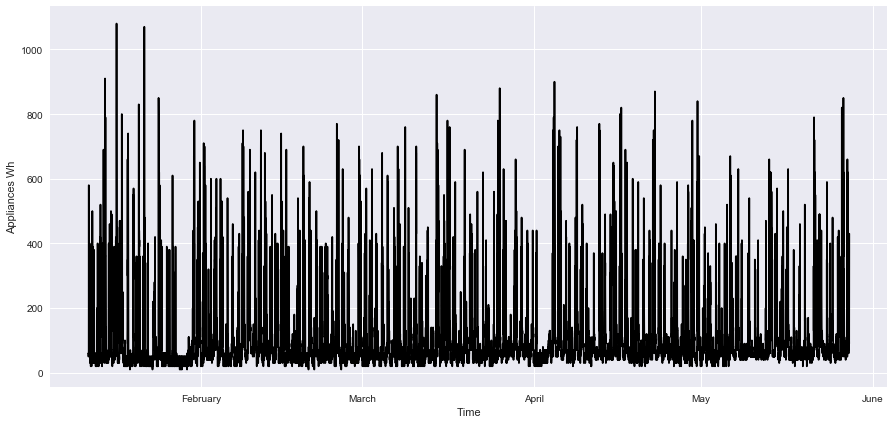

In [7]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(df.index, df['Appliances'], color='black')

m = mdates.DateFormatter("%B")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(m)
plt.ylabel('Appliances Wh')
plt.xlabel('Time')
plt.show()

### Energy consumption of appliances for the first week of data.

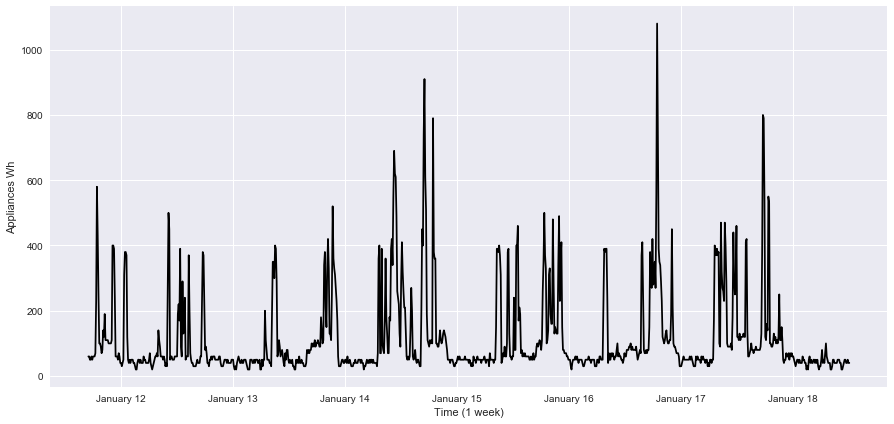

In [8]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(new_df.index, new_df['Appliances'], color='black')

m = mdates.DateFormatter("%B %d")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(m)
plt.ylabel('Appliances Wh')
plt.xlabel('Time (1 week)')
plt.show()

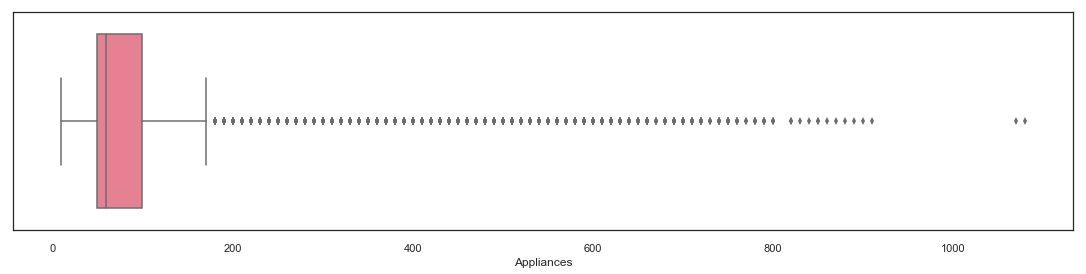

In [9]:
sns.set(style="white", palette="husl")
plt.figure(figsize=(19,4))
b = sns.boxplot(x='Appliances', data=energy)

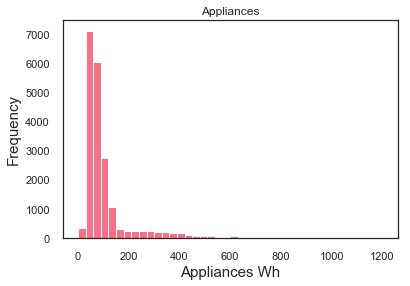

In [10]:
energy.hist(column='Appliances', bins=40, range=(0,1200),grid=False)
plt.xlabel("Appliances Wh", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()

Energy consumption of appliances distribution - over the total period.

In [11]:
key_variables = energy[['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3']]
key_variables.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000


### Correlation Matrix

In [12]:
key_variables.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000


In [13]:
#Function to calculate correlation coefficient between the key varibles
def correlation(x, y, **kwargs):
    
    coef = np.corrcoef(x, y)[0][1]
    #Display result as string and round to 2 decimal places
    label = str(round(coef,2))
    
    # Add label to plot
    axis = plt.gca()
    axis.annotate(label, xy = (0.20, 0.50), size = 50, xycoords = axis.transAxes)

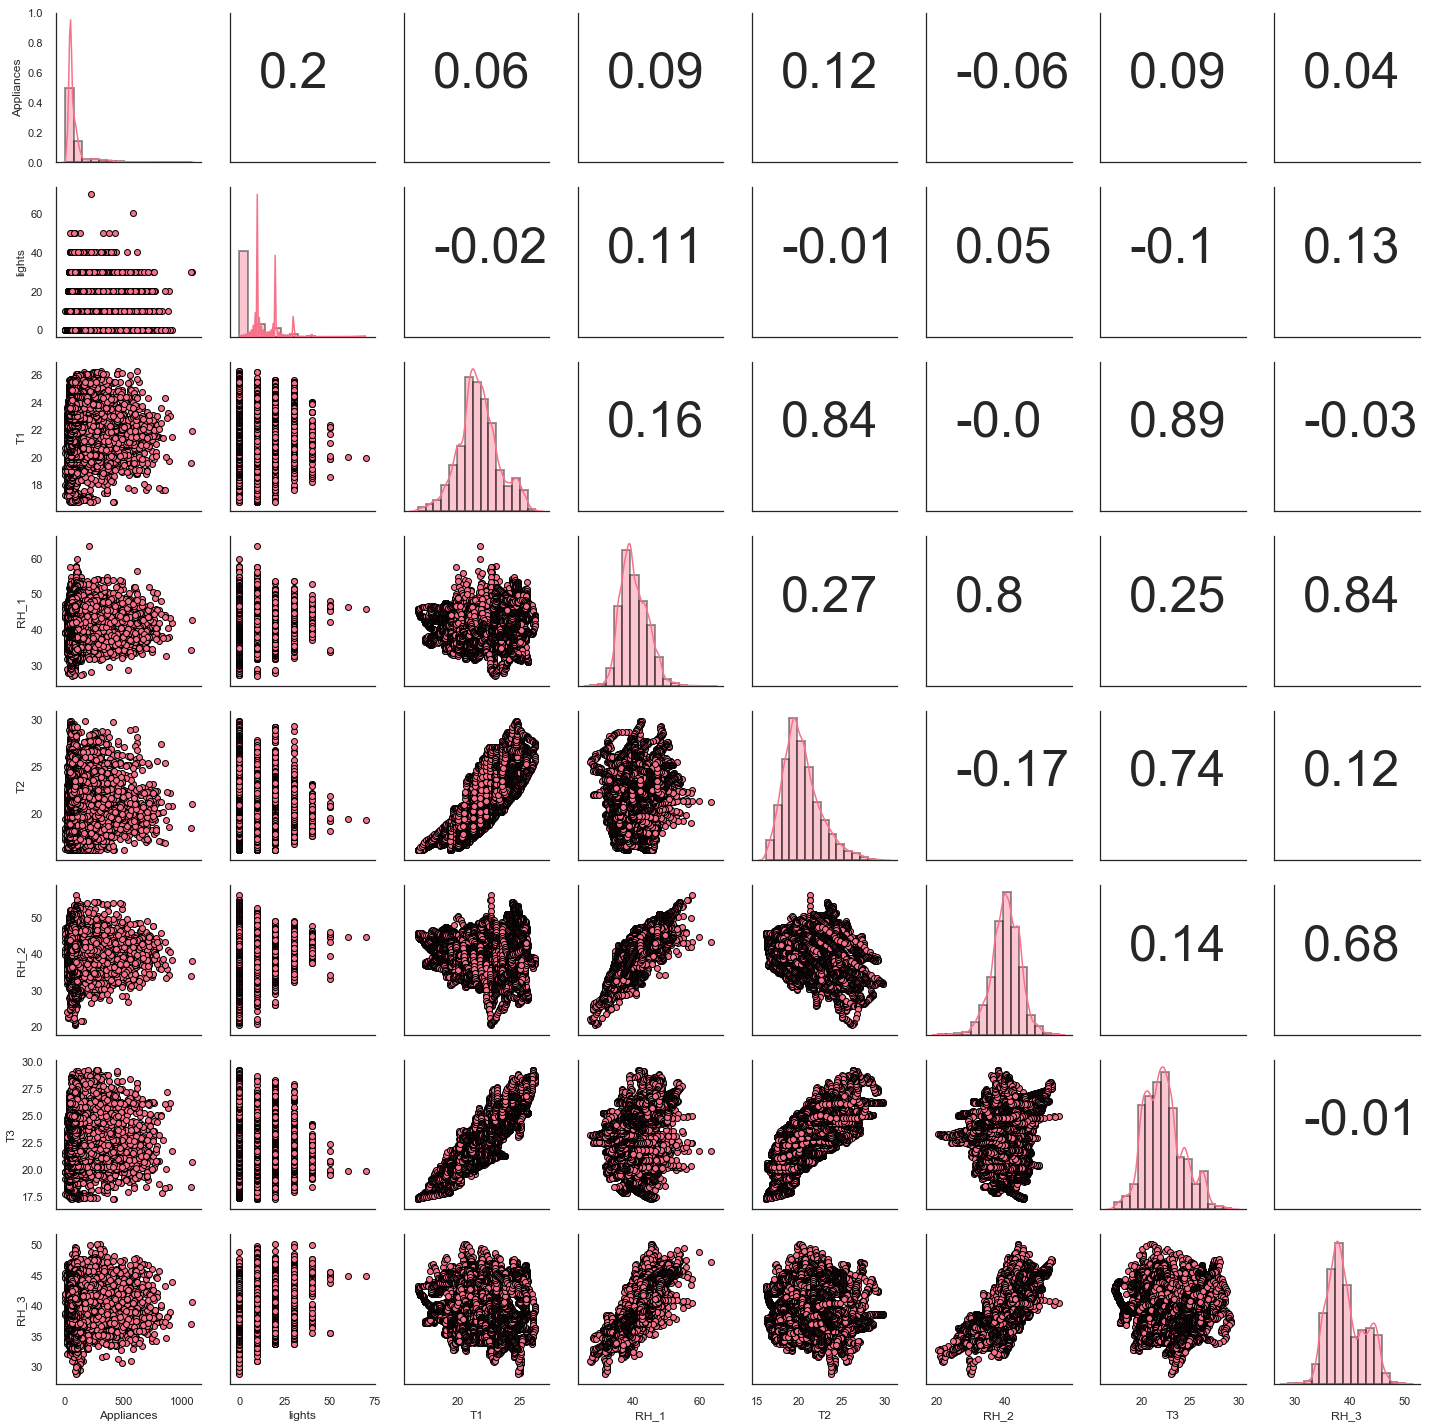

In [14]:
sns.set(style="white", palette="husl")
g = sns.PairGrid(key_variables, diag_sharey=False)
g = g.map_diag(sns.distplot, bins=15, hist=True,hist_kws={"linewidth": 2,"edgecolor":'black',})
g = g.map_lower(plt.scatter,edgecolor = 'k')
g = g.map_upper(correlation)

Pair plot using sns PairGrid to generate a similar graph as displayed in Figure 9 of the paper.

Displaying the relationship between the energy consumption variables of appliances with lights, T1, RH1, T2, RH2, T3, RH3. T1 and RH1.

The plot demonstrates that there is a large correlation between appliances and lights, aswell as appliances and T2.

### Formatting the energy dataframe

In [7]:
#Add the weekday index
df['weekday'] = df.index.weekday
df.head()

,Appliances,weekday
date,,
2016-01-11 17:00:00,60,0
2016-01-11 17:10:00,60,0
2016-01-11 17:20:00,50,0
2016-01-11 17:30:00,50,0
2016-01-11 17:40:00,60,0


In [8]:
#add a new column where weekday value corresponds to the day
days = {0:'Mon',1:'Tues',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
df['day_of_week'] = df['weekday'].apply(lambda x: days[x])
df.head()

,Appliances,weekday,day_of_week
date,,,
2016-01-11 17:00:00,60,0,Mon
2016-01-11 17:10:00,60,0,Mon
2016-01-11 17:20:00,50,0,Mon
2016-01-11 17:30:00,50,0,Mon
2016-01-11 17:40:00,60,0,Mon


In [9]:
#Adapted from https://stackoverflow.com/questions/57577805/my-non-numeric-columns-are-deleted-on-resample
num = df.select_dtypes('int64').columns
non_num = df.columns.difference(num)
d = {**{x: 'sum' for x in num}, **{x: 'first' for x in non_num}}

#resample the data to get the sum of appliance usage for each hour of the day, while keeping the non-numerical data
df = df.resample('H').agg(d)
df.head()

,Appliances,weekday,day_of_week
date,,,
2016-01-11 17:00:00,330,0,Mon
2016-01-11 18:00:00,1060,0,Mon
2016-01-11 19:00:00,1040,0,Mon
2016-01-11 20:00:00,750,0,Mon
2016-01-11 21:00:00,620,0,Mon


In [10]:
#Convert days of week into category data type and order starting with Sunday
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=
    ["Sun","Mon", "Tues", "Wed", "Thurs", "Fri","Sat"],
    ordered=True)

#### This section will include the creation of 4 new data frames from 'df' to plot 4 consecutive weeks of data in a heatmap.

In [11]:
#Week 1 
df1 = df['2016-01-17':'2016-01-23']
#Week 2
df2 = df['2016-01-24':'2016-01-30']
#Week 3
df3 = df['2016-01-31':'2016-02-06']
#Week 4
df4 = df['2016-02-07':'2016-02-13']

In [12]:
#Pivot table by day_of_week column
df1 = pd.pivot_table(df1, index=df1.index.hour, columns=['day_of_week'], values="Appliances")
df1.head()

day_of_week,Sun,Mon,Tues,Wed,Thurs,Fri,Sat
date,,,,,,,
0,280,270,280,220,250,240,260
1,310,260,270,270,330,220,190
2,260,260,200,190,250,230,210
3,300,250,280,260,300,240,230
4,310,270,200,250,240,220,180


In [13]:
df2 = pd.pivot_table(df2, index=df2.index.hour, columns=['day_of_week'], values="Appliances")
df2.head()

day_of_week,Sun,Mon,Tues,Wed,Thurs,Fri,Sat
date,,,,,,,
0,210,290,1180,270,260,200,260
1,260,290,260,210,180,260,200
2,190,250,270,240,250,250,270
3,270,290,210,190,250,180,220
4,190,230,290,250,200,240,210


In [14]:
df3 = pd.pivot_table(df3, index=df3.index.hour, columns=['day_of_week'], values="Appliances")
df3.head()

day_of_week,Sun,Mon,Tues,Wed,Thurs,Fri,Sat
date,,,,,,,
0,280,270,370,360,230,220,290
1,210,280,300,390,270,260,280
2,270,230,270,390,280,290,270
3,280,290,280,290,190,260,270
4,220,270,270,360,280,210,220


In [15]:
df4 = pd.pivot_table(df4, index=df4.index.hour, columns=['day_of_week'], values="Appliances")
df4.head()

day_of_week,Sun,Mon,Tues,Wed,Thurs,Fri,Sat
date,,,,,,,
0,230,280,280,420,270,400,380
1,260,280,290,430,320,260,320
2,270,270,250,400,320,330,240
3,260,280,220,410,260,330,310
4,270,270,280,400,280,340,290


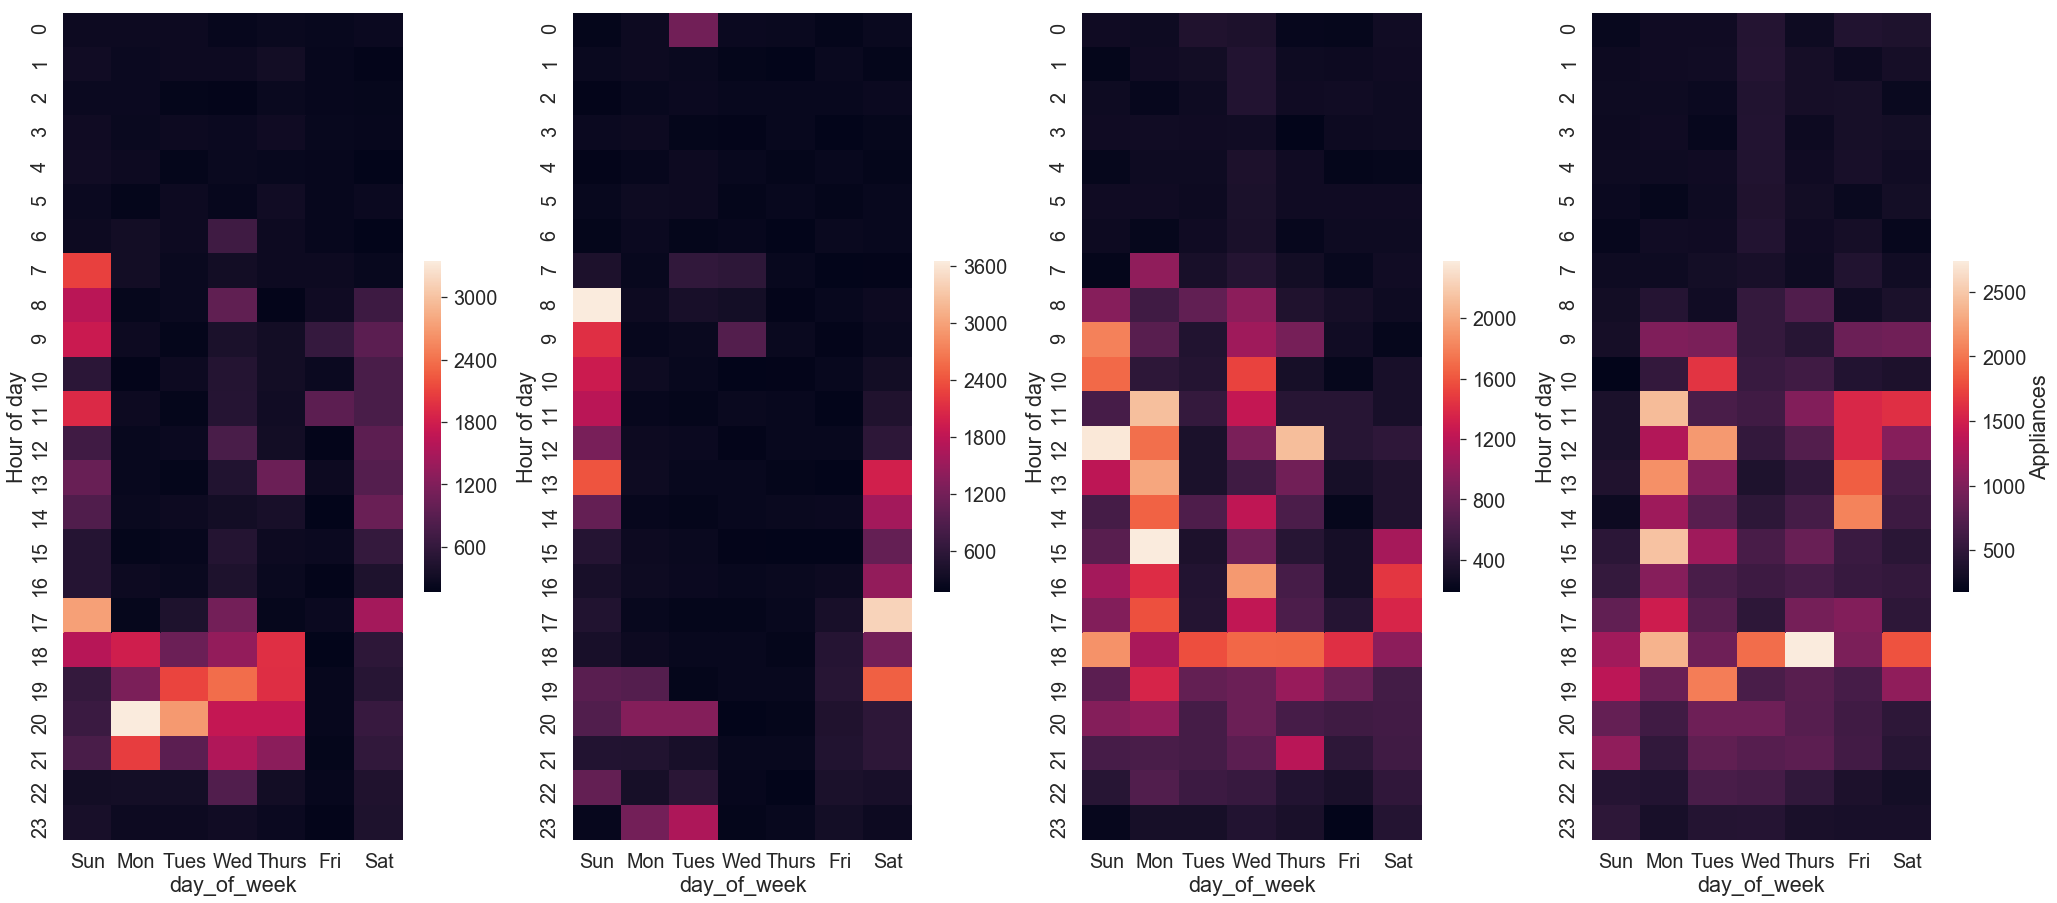

In [90]:
fig = plt.figure(figsize = (35,70))
ax1 = fig.add_subplot(4, 4, 1) # row, column, position (4 row, 4 col)
ax2 = fig.add_subplot(4, 4, 2)
ax3 = fig.add_subplot(4, 4, 3)
ax4 = fig.add_subplot(4, 4, 4)

# Use ax parameter to tell seaborn which subplot to use for each plot
sns.heatmap(df1, ax=ax1, cbar_kws={'shrink': .4})
sns.heatmap(df2, ax=ax2, cbar_kws={'shrink': .4})
sns.heatmap(df3, ax=ax3, cbar_kws={'shrink': .4})
sns.heatmap(df4, ax=ax4, cbar_kws={'label': 'Appliances','shrink': .4})
ax1.set_ylabel('Hour of day')
ax2.set_ylabel('Hour of day')
ax3.set_ylabel('Hour of day')
ax4.set_ylabel('Hour of day')
sns.set(font_scale=1.8)

In the paper the authours plot a heatmap of 4 consecutive weeks of data to idenity any time trends. The above heatmap shows appliance energy consumption per hour for each day of the week. Looking at the days of the week there is no clear pattern of energy consumption. However, overall enery consumption starts to rise at 6am. There are also heavier uses of energy in the evenings starting at 6pm.

In [6]:
train.shape

(14803, 32)

In [7]:
test.shape

(4932, 32)

In [8]:
train.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus',
       'Day_of_week'],
      dtype='object')

In [9]:
x_train= train.drop(['Appliances', 'date','WeekStatus', 'Day_of_week' ], axis=1)
y_train = train['Appliances']

x_test = test.drop(['Appliances','date','WeekStatus', 'Day_of_week'], axis=1)
y_test = test['Appliances']

print('X_train shape:',x_train.shape )
print('Y_train shape:',y_train.shape )
print('X_test shape:',x_test.shape )
print('Y_test shape:',y_test.shape )

X_train shape: (14803, 28)
Y_train shape: (14803,)
X_test shape: (4932, 28)
Y_test shape: (4932,)


In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [11]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
y_train_pred = model.predict(x_train)

mse= mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)

print('Training set metrics')
print("MSE:", mse)
print("R Squared:", r2)
print("MAE:", mae)

Training set metrics
MSE: 8755.613389016335
R Squared: 0.17188056846730482
MAE: 53.255031292957746


In [13]:
y_test_pred = model.predict(x_test)

mse= mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

print('Training set metrics')
print("MSE:", mse)
print("R Squared:", r2)
print("MAE:", mae)

Training set metrics
MSE: 8754.269104277762
R Squared: 0.15199183390308546
MAE: 52.075015316596684


In [14]:
#week_status = train['WeekStatus']
#week_s = pd.get_dummies(week_status)
#week_s.head()

In [15]:
day_week = train['Day_of_week']
day_w = pd.get_dummies(day_week)

day_w.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0


In [16]:
x_train = train.join(day_w)
x_train.shape

(14803, 39)

In [17]:
x_train = train.join(week_s)
x_train.shape

(14803, 34)

In [17]:
x_train.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus',
       'Day_of_week', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday'],
      dtype='object')

In [18]:
x_new = pd.DataFrame()
for col in x_train.columns:
    x_new[col] = x_train[col]
    print(x_new.shape)

(14803, 1)
(14803, 2)
(14803, 3)
(14803, 4)
(14803, 5)
(14803, 6)
(14803, 7)
(14803, 8)
(14803, 9)
(14803, 10)
(14803, 11)
(14803, 12)
(14803, 13)
(14803, 14)
(14803, 15)
(14803, 16)
(14803, 17)
(14803, 18)
(14803, 19)
(14803, 20)
(14803, 21)
(14803, 22)
(14803, 23)
(14803, 24)
(14803, 25)
(14803, 26)
(14803, 27)
(14803, 28)
(14803, 29)
(14803, 30)
(14803, 31)
(14803, 32)
(14803, 33)
(14803, 34)
(14803, 35)
(14803, 36)
(14803, 37)
(14803, 38)
(14803, 39)


In [19]:
x_new.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,NSM,WeekStatus,Day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,61200,Weekday,Monday,0,1,0,0,0,0,0
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,61800,Weekday,Monday,0,1,0,0,0,0,0
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,62400,Weekday,Monday,0,1,0,0,0,0,0
3,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,63600,Weekday,Monday,0,1,0,0,0,0,0
4,2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,64200,Weekday,Monday,0,1,0,0,0,0,0


In [22]:
x_train = x_new.drop(['Appliances', 'date','WeekStatus', 'Day_of_week' ], axis=1)
y_train = x_new['Appliances']
print('X_train shape:',x_train.shape )
print('Y_train shape:',y_train.shape )

X_train shape: (14803, 35)
Y_train shape: (14803,)


In [25]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
y_train_p = model.predict(x_train)

mse= mean_squared_error(y_train, y_train_p)
r2 = r2_score(y_train, y_train_p)
mae = mean_absolute_error(y_train, y_train_p)

print('Training set metrics')
print("MSE:", mse)
print("R Squared:", r2)
print("MAE:", mae)

Training set metrics
MSE: 8687.278741530838
R Squared: 0.17834376492372517
MAE: 53.13891233505933
